In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import math
import time

# 25%, 50%, 75%, 100% Error detection check 

C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0 57a3fd9e296d6d0f68c9b15b
1 57a3e843e2013f4c3b94ed9d
2 57a3e45ae2013f24c75d9b0c
3 57a2e1c2296d6d1b0bd347bb
4 57a3418fe2013f74245d9e1e
5 57a343ca296d6d719bc9affc
6 57a29750e2013f454f5d9ee7
7 57a2a055e2013f0c5a5da42b
8 57a39839296d6d6277d34244
9 57a3ecbfe2013f18395d9c7f
10 57a3db65e2013f3fbd5d9c77
11 57a3e761e2013f5d16dccc93
12 57a2a002296d6d22f946f089
13 57a37f89296d6d604246f3be
14 57a3d936e2013f3fbd5d9b17
15 57a281cd296d6d6433d34423
16 57a3ed4ae2013f65fddcd1b3
17 57a3fbbee2013f6195dcd17f
18 57a3418fe2013f74245d9e1d
19 57a39f37296d6d6277d34787
20 57a2a946e2013f454f5da9ce
21 57a39bade2013f65975d9f2b
22 57a2ad87296d6d6d6346e989
23 57a3f6c3e2013f18395da7b7
24 57a2964ce2013f2213dcd33b
25 57a2dd34296d6d2f7546ee79
26 57a2ea97e2013f699794e939
27 57a329d1296d6d5dcad3438a
28 57a2b367296d6d6d6346efff
29 57a3e315e2013f742194e9fb
30 57a3eb3be2013f18395d9ac9
31 57a3eb27e2013f7b8394ef1a
32 57a2964ce2013f2213dcd340
33 57a358da296d6d689fd342bb
34 57a2ba26296d6d019c46ee44
35 57a3479c296d6d6ceed341d4
36

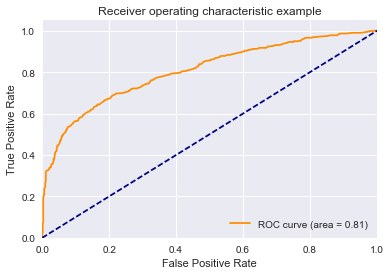

Area Under the ROC Curve is  0.805830301455


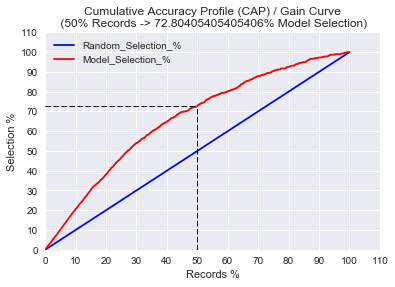

In [112]:
main = pd.read_csv('all_variable_master.csv')
y = main['error']
main.drop(['error'], axis =1, inplace = True)
x = main

#Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =101)
x_train.drop(['task_id'], axis =1, inplace = True)
#x_test.drop(['task_id'], axis =1, inplace = True)


from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x_train)
x_train = x

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
"""from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_ = sc.fit_transform(x_test)
x_test = x_ 

#3) Random Forrest
print ('Random Forrest')

#Importing logistic resgression and fitting it to data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train,y_train) 

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])
#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)"""

#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

tasks = x_test['task_id']

original = pd.read_csv('CloudFactory_DataSet_Accuracy_Prediction.tsv', sep='\t')
original['keypress_keytypeint'].fillna(value = 0, inplace = True)


transition = np.zeros((tasks.shape[0],13,13))
transition_norm = np.zeros((tasks.shape[0],13,13))

tasks.reset_index(level=0, drop= True, inplace = True)


for i,task in enumerate (tasks):
    print (i, task)
    temp = original[original['task_id']==task].reset_index(level=0, drop = True)
    jam = math.ceil(temp.shape[0] * 3 / 4)
    df = temp.head(jam)
    df.reset_index(level=0, drop= True, inplace = True)
    for index,row in df.iterrows():
        # Think of different task_ids
        if index == 0:
            continue
        
        entry = np.int(df.loc[index - 1]['keypress_keytypeint'])
        exit = np.int(df.loc[index]['keypress_keytypeint'])
        transition[i,entry,exit] += 1      
            
    transition[i] = np.array(transition[i])
    transition_norm[i] = transition[i]/df.shape[0]
    
trans_row = pd.DataFrame()
for i in range (0,tasks.shape[0]):
    a = pd.DataFrame(transition_norm[i].transpose().reshape(169)).transpose()
    trans_row = trans_row.append(a)

trans_row.reset_index(level=0,drop = True, inplace = True)
temp_ = x_test[x_test.columns[0:12]]
temp_.reset_index(level=0, drop = True,inplace = True)
x_test_ = pd.concat([temp_,trans_row], axis =1)
x_test_.drop(['task_id'], axis =1, inplace = True)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_ = sc.fit_transform(x_test_)
x_test = x_ 

#3) Random Forrest
print ('Random Forrest')

#Importing logistic resgression and fitting it to data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train,y_train)

#Making predictions from test data
predictions = model.predict(x_test)
y_score = model.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])
#CAP CURVE 
# Create CAP dataset
Y_cap = np.c_[y_test,y_score[:, 1:]]
df = pd.DataFrame(data=Y_cap)
df = df.sort_values([1], ascending=False).reset_index('index', drop=True)
#df.to_csv('CAP.csv',sep=';')
 
percent = 50    

# Append relevant columns to df to construct CAP figure
records = len(df.index)           # total records
n_acted = df[0].sum()             # total action
df['Records_%'] = pd.Series((np.linspace(1,records,records)/records)*100, index = df.index)
df['Random_Selection_%'] = df['Records_%']
df['Model_Selection_%'] = pd.Series(np.ones(records), index = df.index)
for i in range(1, records):
    df['Model_Selection_%'][i] = df[0][i] + df['Model_Selection_%'][i-1]
df['Model_Selection_%']=(df['Model_Selection_%']/n_acted)*100


# Obtain % Model Selection value (interpolate if necessary)
val_y1 = df[df['Records_%']<=percent].iloc[-1]['Model_Selection_%']
val_y2 = df[df['Records_%']>=percent].iloc[0]['Model_Selection_%']
if val_y1 == val_y2:
    val = val_y1*1.0
else:
    val_x1 = df[df['Records_%']<=percent].iloc[-1]['Records_%']
    val_x2 = df[df['Records_%']>=percent].iloc[0]['Records_%']
    val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
 

#Visualising the Cumulative Accuracy Profile (CAP / Gain Curve)
fig, ax = plt.subplots(nrows = 1, ncols = 1)  # create figure & 1 axis
ax.plot(df['Records_%'], df['Random_Selection_%'], color = 'blue')
ax.plot(df['Records_%'], df['Model_Selection_%'], color = 'red')

# Add dotted lines to chosen % Records
ax.plot([percent, percent], [0.0, val], color='k', linestyle='--', linewidth=1)
ax.plot([0, percent], [val, val], color='k', linestyle='--', linewidth=1)
plt.title('Cumulative Accuracy Profile (CAP) / Gain Curve'+
          '\n ({a}% Records -> {b}% Model Selection)'.format(a = percent, b = val))
plt.xlabel('Records %')
plt.ylabel('Selection %')
plt.xlim(0.0, 110.0)
plt.xticks(np.linspace(0.0, 110, 12))
plt.ylim(0.0, 110.0)
plt.yticks(np.linspace(0.0 ,110 , 12))
plt.legend()
plt.show()
fig.savefig('CAP-logit.png', bbox_inches = 'tight')
plt.close(fig)



# Real-Time-Error detection

In [154]:
main = pd.read_csv('all_variable_master.csv')
y = main['error']
main.drop(['error'], axis =1, inplace = True)
x = main

#Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =101)
x_train.drop(['task_id'], axis =1, inplace = True)
#x_test.drop(['task_id'], axis =1, inplace = True)


from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x_train)
x_train = x

#Importing logistic resgression and fitting it to data
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train,y_train)

original = pd.read_csv('CloudFactory_DataSet_Accuracy_Prediction.tsv', sep='\t')
original['keypress_keytypeint'].fillna(value = 0, inplace = True)

tasks = ['57a2a002296d6d22f946f089','57a3fc0a296d6d0fd5c9b506','57a2b020296d6d729dc9b270']

for task in tasks:
    print ('---------------------------')
    print ('---------------------------')
    print ('You are working on a task id ' + str(task))
    temp = original[original['task_id'] == task].reset_index(level=0, drop = True)
    df_ = main [main['task_id']==task]
    #print(df_)
    shape = temp.shape[0]
    transition = np.zeros((13,13))
    transition_norm = np.zeros((13,13))
    for i in range(0,shape):
        perc = (i+1)/shape * 100
        df = temp.head(i+1)
        df.reset_index(level=0, drop= True, inplace = True)
        for index,row in df.iterrows():
            # Think of different task_ids
            if index == 0:
                continue

            entry = np.int(df.loc[index - 1]['keypress_keytypeint'])
            exit = np.int(df.loc[index]['keypress_keytypeint'])
            transition[entry,exit] += 1      

        transition = np.array(transition)
        transition_norm = transition/df.shape[0]

        trans_row = pd.DataFrame()
        a = pd.DataFrame(transition_norm.transpose().reshape(169)).transpose()
        trans_row = trans_row.append(a)

        trans_row.reset_index(level=0,drop = True, inplace = True)
        temp_ = df_[df_.columns[0:12]]
        temp_.reset_index(level=0, drop = True,inplace = True)
        x_test_ = pd.concat([temp_,trans_row], axis =1)
        x_test_.drop(['task_id'], axis =1, inplace = True)
        prob = model.predict_proba(x_test_)
        y_score = prob[0][1]
        print ('------------')
        print (str(round(perc,2)) + '% task is completed')
        if (y_score > 0.5):
            if (y_score>0.65):
                print ('CAREFUL!!! High chances of making error with prob '+ str(y_score))
            #else:
                #print ('Chances of making error are '+ str(y_score) )
        else:
            print('You are doing a grat job!')
        time.sleep(0.05) # delays for 5 seconds

C:\Users\Chinmay\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


---------------------------
---------------------------
You are working on a task id 57a2a002296d6d22f946f089
------------
0.69% task is completed
------------
1.38% task is completed
------------
2.07% task is completed
------------
2.76% task is completed
------------
3.45% task is completed
------------
4.14% task is completed
------------
4.83% task is completed
------------
5.52% task is completed
------------
6.21% task is completed
------------
6.9% task is completed
------------
7.59% task is completed
------------
8.28% task is completed
------------
8.97% task is completed
------------
9.66% task is completed
------------
10.34% task is completed
------------
11.03% task is completed
------------
11.72% task is completed
------------
12.41% task is completed
------------
13.1% task is completed
------------
13.79% task is completed
------------
14.48% task is completed
------------
15.17% task is completed
------------
15.86% task is completed
------------
16.55% task is comp

In [157]:
worker = pd.read_csv('receipt_worker_profile (1).tsv', sep='\t')
worker.dropna(axis=0, inplace = True)

#worker['academic_degree'].unique()

worker = worker.assign(Education = 0)

worker.loc[worker['academic_degree']=='["Higher Secondary or equivalent level"]', 'Education'] = 1
worker.loc[worker['academic_degree']=='[]','Education'] = 1 
worker.loc[worker['academic_degree']=='["Bachelor\'s or equivalent level"]','Education'] = 2
worker.loc[worker['academic_degree']=='["Master\'s or equivalent level"]','Education'] = 3
worker.loc[worker['academic_degree']=='["Secondary or equivalent level"]','Education'] = 0
worker.loc[worker['academic_degree']=='["Master\'s or equivalent level", "Bachelor\'s or equivalent level", "Higher Secondary or equivalent level"]','Education'] = 3
worker.loc[worker['academic_degree']=='["Higher Secondary or equivalent level", "Bachelor\'s or equivalent level", "Master\'s or equivalent level"]','Education'] = 3
worker.loc[worker['academic_degree']=='["Bachelor\'s or equivalent level", "Higher Secondary or equivalent level", "Secondary or equivalent level"]','Education'] = 2
worker.loc[worker['academic_degree']=='["Bachelor\'s or equivalent level", "Master\'s or equivalent level"]','Education'] = 2
worker.loc[worker['academic_degree']=='["Higher Secondary or equivalent level", "Bachelor\'s or equivalent level"]','Education'] = 2
worker.loc[worker['academic_degree']=='["Higher Secondary or equivalent level", "Secondary or equivalent level"]','Education'] = 2

worker = worker.assign(Sex = 0)
worker.loc[worker['gender'] == 'Male', 'Sex'] = 1
worker.loc[worker['gender'] == 'Female', 'Sex'] = 0


worker['onbarded_date'] = pd.to_datetime(worker['onbarded_date'])
today = datetime.date.today()
worker =worker.assign(experience = 0)
worker['experience'] = today - worker['onbarded_date']
worker = worker.assign(exp = 0)
worker['exp'] = worker['experience'].dt.days/365


In [158]:
worker.columns

Index(['worker_id', 'onbarded_date', 'birth_year', 'gender', 'academic_degree',
       'Education', 'Sex', 'experience', 'exp'],
      dtype='object')

In [160]:
worker.drop(['onbarded_date', 'birth_year', 'gender', 'academic_degree','experience'], axis =1)

,worker_id,Education,Sex,exp
0,501767d1cb022453170004dc,1,1,4.717808
1,503b89aacb02245d320001a4,1,1,4.643836
2,50531712cb022432f3000f27,1,1,4.594521
3,5059b9b4cb02246c1200017d,2,1,4.580822
4,50b59592ed964941970005b6,1,1,4.389041
5,50b6078eed9649419f000758,2,0,4.389041
6,50c08ac0c32206041f000109,3,1,4.367123
7,50c95201ed9649711300004f,1,1,4.347945
8,50ca9696cb0224456b0012ba,2,1,4.345205
9,50cdd243ed9649443f00035b,1,0,4.339726
